In [5]:
import pandas as pd
import numpy as np

# Test the imports
data = {'column1': [1, 2, 3], 'column2': [4, 5, 6]}
df = pd.DataFrame(data)
print(df)

array = np.array([1, 2, 3])
print(array)

   column1  column2
0        1        4
1        2        5
2        3        6
[1 2 3]


In [6]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk textblob

Defaulting to user installation because normal site-packages is not writeable


In [8]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  # Corrected
from sklearn.naive_bayes import MultinomialNB  # Corrected
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import re

   column1  column2
0        1        4
1        2        5
2        3        6


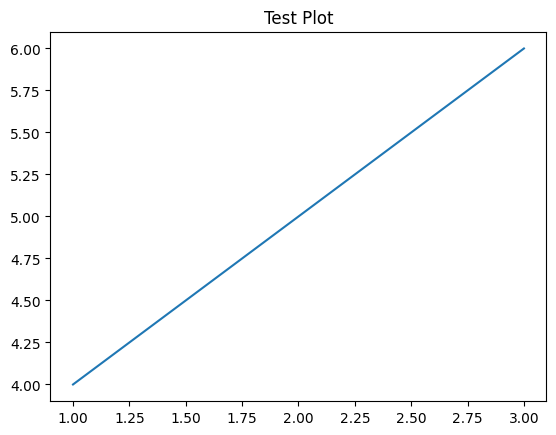

In [9]:
# Test pandas and numpy
data = {'column1': [1, 2, 3], 'column2': [4, 5, 6]}
df = pd.DataFrame(data)
print(df)

# Test matplotlib
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Test Plot")
plt.show()


In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
# Load the dataset
file_path = "amazon.csv"  # Update the file path to match the location
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [16]:
df.isnull().sum()


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [17]:
# Option 1: Drop rows with missing values in 'rating_count'
df.dropna(subset=['rating_count'], inplace=True)

# Option 2: Fill missing values with the median of 'rating_count'
# df['rating_count'].fillna(df['rating_count'].median(), inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [18]:
df.nunique()

product_id             1349
product_name           1335
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1291
user_id                1192
user_name              1192
review_id              1192
review_title           1192
review_content         1210
img_link               1410
product_link           1463
dtype: int64

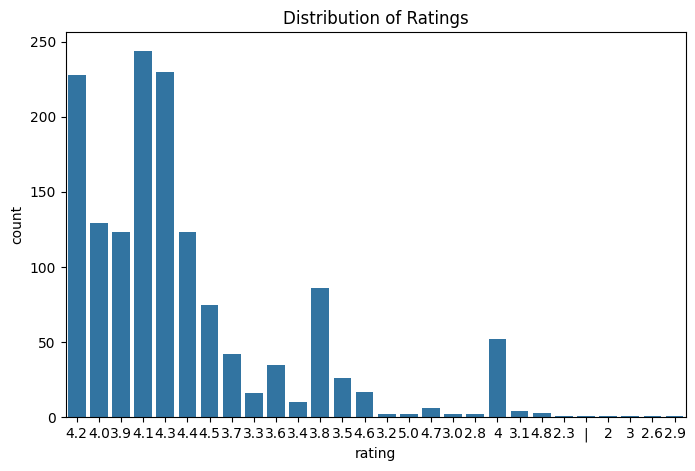

In [19]:
# Step 1: Analyze the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df)
plt.title("Distribution of Ratings")
plt.show()

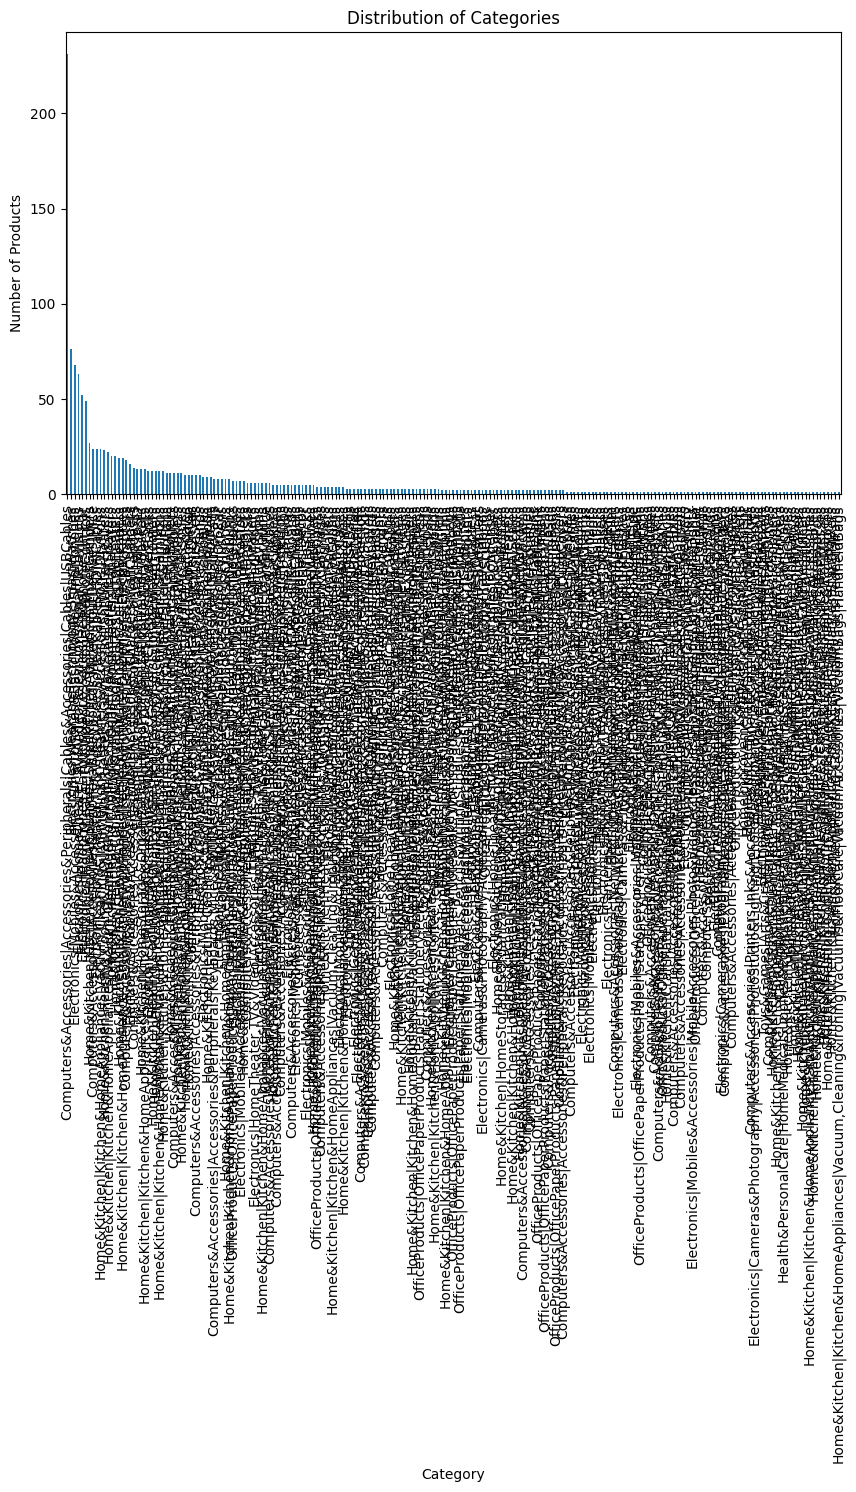

In [20]:
# Step 2: Analyze the distribution of categories
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')
plt.title("Distribution of Categories")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()


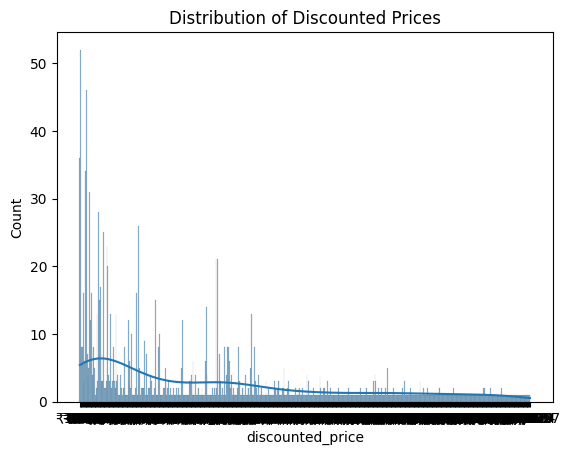

In [21]:
sns.histplot(df['discounted_price'], bins=30, kde=True)
plt.title("Distribution of Discounted Prices")
plt.show()

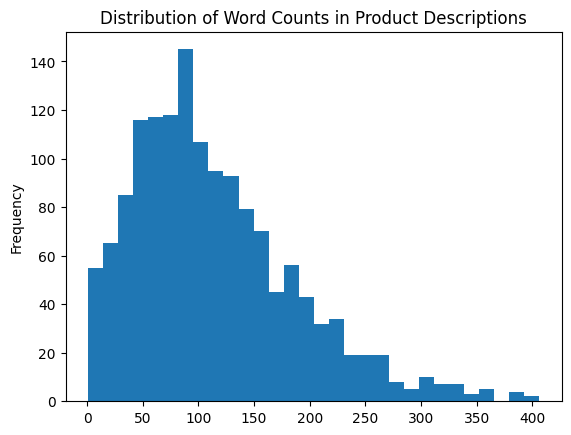

In [22]:
df['about_product'].str.split().apply(len).plot(kind='hist', bins=30)
plt.title("Distribution of Word Counts in Product Descriptions")
plt.show()


In [25]:
print(df.columns)

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [26]:
df.dropna(subset=['review_content'], inplace=True)

In [27]:
print(df.isnull().sum())


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [28]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    return text

# Apply the cleaning function to the correct column
df['cleaned_review'] = df['review_content'].apply(clean_text)

In [29]:
# Display the first few rows of the cleaned reviews
print(df[['review_content', 'cleaned_review']].head())

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                      cleaned_review  
0  looks durable charging is fine toono complains...  
1  i ordered this cable to connect my phone to an...  
2  not quite durable and sturdyhttpsmmediaamazonc...  
3  good productlong wirecharges goodnicei bought ...  
4  bought this instead of original apple does the...  


In [30]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove special characters and numbers, but preserve spaces
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the updated cleaning function
df['cleaned_review'] = df['review_content'].apply(clean_text)

In [31]:
# Display the first few rows of the cleaned reviews
print(df[['review_content', 'cleaned_review']].head())

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                      cleaned_review  
0  looks durable charging is fine toono complains...  
1  i ordered this cable to connect my phone to an...  
2  not quite durable and sturdy good nice product...  
3  good product long wire charges good nice i bou...  
4  bought this instead of original apple does the...  


In [32]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['cleaned_review'] = df['cleaned_review'].apply(remove_stopwords)

In [33]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['cleaned_review'].apply(get_sentiment)

In [34]:
# Apply the sentiment analysis function
df['sentiment'] = df['cleaned_review'].apply(get_sentiment)


In [35]:
# Display the first few rows for comparison
print(df[['cleaned_review', 'sentiment']].head())


                                      cleaned_review sentiment
0  looks durable charging fine toono complains ch...  positive
1  ordered cable connect phone android auto car c...  positive
2  quite durable sturdy good nice product working...  positive
3  good product long wire charges good nice bough...  positive
4  bought instead original apple work rs fast app...  positive


In [36]:
# Inspect a specific row
print("Review:", df.loc[0, 'cleaned_review'])
print("Sentiment:", df.loc[0, 'sentiment'])

Review: looks durable charging fine toono complains charging really fast good product till satisfied quality good product charging speed slower original iphone cable good quality would recommend worked well till date issue cable also sturdy enough asked replacement company value money
Sentiment: positive


In [38]:
# Check the number of rows before removing duplicates
print("Number of rows before removing duplicates:", len(df))

Number of rows before removing duplicates: 1192


In [39]:
# Remove duplicate reviews
df.drop_duplicates(subset=['cleaned_review'], inplace=True)

In [40]:
# Check the number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(df))

Number of rows after removing duplicates: 1192


In [42]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment']

In [43]:
print("Shape of X:", X.shape)

Shape of X: (1192, 5000)


In [44]:
# Get the feature names (words)
feature_names = tfidf.get_feature_names_out()

# Display the first 10 feature names
print("First 10 feature names (words):", feature_names[:10])

First 10 feature names (words): ['aa' 'aaa' 'aacha' 'aachha' 'aata' 'ab' 'abandoned' 'ability' 'able'
 'abnormal']


In [45]:
# Inspect TF-IDF values for the first review
print("TF-IDF values for the first review:")
print(X[0])  # TF-IDF values for the first review

# Map the TF-IDF values to their corresponding words
tfidf_values = X[0]
non_zero_indices = tfidf_values.nonzero()[0]  # Indices of non-zero values
for index in non_zero_indices:
    print(f"Word: {feature_names[index]}, TF-IDF Value: {tfidf_values[index]}")

TF-IDF values for the first review:
[0. 0. 0. ... 0. 0. 0.]
Word: also, TF-IDF Value: 0.08737533411996405
Word: asked, TF-IDF Value: 0.2206783583736434
Word: cable, TF-IDF Value: 0.25048832669586973
Word: charging, TF-IDF Value: 0.39313176927284293
Word: company, TF-IDF Value: 0.16419026984934124
Word: complains, TF-IDF Value: 0.28092973681098193
Word: date, TF-IDF Value: 0.20335067504443005
Word: durable, TF-IDF Value: 0.16229973734967862
Word: enough, TF-IDF Value: 0.13631743842119115
Word: fast, TF-IDF Value: 0.12503483721239542
Word: fine, TF-IDF Value: 0.1093828112379861
Word: good, TF-IDF Value: 0.1463621169251456
Word: iphone, TF-IDF Value: 0.19808846983469236
Word: issue, TF-IDF Value: 0.13323164019505274
Word: looks, TF-IDF Value: 0.12420677465308286
Word: money, TF-IDF Value: 0.09344940579820965
Word: original, TF-IDF Value: 0.15622659025346772
Word: product, TF-IDF Value: 0.10279305252104007
Word: quality, TF-IDF Value: 0.1363770846141134
Word: really, TF-IDF Value: 0.109682

In [46]:
# Display the first few sentiment labels
print("First 10 sentiment labels:")
print(y[:10])

First 10 sentiment labels:
0     positive
1     positive
2     positive
3     positive
4     positive
5     positive
6     positive
7     positive
8     positive
10    positive
Name: sentiment, dtype: object


In [47]:
print("Number of reviews in X:", X.shape[0])
print("Number of reviews in y:", len(y))

Number of reviews in X: 1192
Number of reviews in y: 1192


In [49]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

MultinomialNB()

In [51]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the first few predictions
print("First 10 predictions:", y_pred[:10])
print("First 10 actual labels:", y_test[:10])

First 10 predictions: ['positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive']
First 10 actual labels: 1193    positive
329     positive
345     positive
207     positive
796     positive
778     positive
1076    positive
69      positive
1026    positive
887     positive
Name: sentiment, dtype: object


In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.99581589958159
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       1.00      1.00      1.00       238

    accuracy                           1.00       239
   macro avg       0.50      0.50      0.50       239
weighted avg       0.99      1.00      0.99       239

Confusion Matrix:
[[  0   1]
 [  0 238]]


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [53]:
print(df['sentiment'].value_counts())

sentiment
positive    1188
negative       4
Name: count, dtype: int64


In [54]:
from sklearn.naive_bayes import MultinomialNB

# Calculate class weights
class_weights = {label: len(y_train) / (len(set(y_train)) * count) for label, count in y_train.value_counts().items()}

# Train the model with class weights
model = MultinomialNB(class_prior=[class_weights[label] for label in model.classes_])
model.fit(X_train, y_train)

MultinomialNB(class_prior=[158.83333333333334, 0.501578947368421])

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.01      1.00      0.01         1
    positive       1.00      0.36      0.53       238

    accuracy                           0.36       239
   macro avg       0.50      0.68      0.27       239
weighted avg       1.00      0.36      0.53       239

Confusion Matrix:
[[  1   0]
 [152  86]]
